In [1]:
import os
import re
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

In [2]:
nltk.download('stopwords')
# pos_tag
nltk.download('averaged_perceptron_tagger')
# WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
stopwords_nltk = list(stopwords.words('english'))
stopwords_nltk = [w for w in stopwords_nltk if "n't" not in w and w not in ['no', 'not']]
len(stopwords_nltk)

159

# Source data

In [6]:
review_file = '../data/init/tripadvisor_hotel_reviews.csv'

In [7]:
review_df = pd.read_csv(review_file, sep=',')
review_df.shape

(20491, 2)

In [6]:
review_df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


<AxesSubplot:>

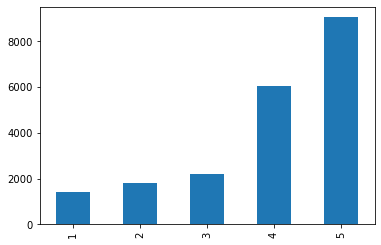

In [8]:
review_df['Rating'].value_counts().sort_values().plot.bar()

# Data preparation

In [193]:
def prepare_text(text):
    words = text.split(' ')
    words = [w.lower() for w in words if w not in stopwords_nltk]
    words = [re.sub(r'[!@#$%^&№()_=*/+-.,<>:;"\'`~\[(\]{}|\\]', '', w) for w in words]
    return ' '.join([w for w in words if w !=''])

In [57]:
pos_tags = {
    'NN': 'n',
    'VB': 'v',
    'JJ': 'a',
    'RB': 'r'   
}

In [59]:
nltk_lemma_tag = lambda pos: pos_tags.get(pos[:2], 'n')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split(' ')
    words_poses = nltk.pos_tag(words)
    words = [lemmatizer.lemmatize(w, pos=nltk_lemma_tag(pos)) for (w, pos) in words_poses]
    return ' '.join(words)

In [197]:
review_df["Review"] = review_df["Review"].apply(lambda text: prepare_text(text))
review_df["Review"] = review_df["Review"].apply(lambda text: lemmatize_text(text))
review_df.head()

,Review,Rating
0,nice hotel expensive parking get good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room 4 experience hotel monaco seattle go...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay go seahawk game awesome ...,5


In [198]:
name, ext = os.path.splitext(review_file)
review_prepared_file = '{}_prep{}'.format(name, ext)
review_prepared_file

'./data/tripadvisor_hotel_reviews_prep.csv'

In [199]:
review_df.to_csv(review_prepared_file, sep=',', index=False)

### N-grams

In [273]:
n = 2

In [274]:
ngrams_review_list = [ngrams(text.split(' '), n) for text in review_df["Review"]]
len(ngrams_review_list)

20491

In [275]:
ngrams_list = [ngram for ngrams in ngrams_review_list for ngram in ngrams]
len(ngrams_list)

2045044

In [276]:
ngrams_counter = np.array(Counter(ngrams_list).most_common())
len(ngrams_counter)

894505

<BarContainer object of 10 artists>

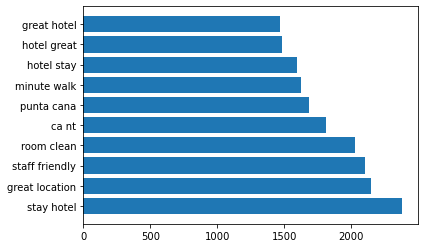

In [277]:
k = 10
plt.barh([' '.join(ws) for ws in ngrams_counter[:k, 0]], ngrams_counter[:k, 1])